In [ ]:
!pip install python-binance

In [2]:
import numpy as np
import pandas as pd
from binance.client import Client
import json
import matplotlib.pyplot as plt

In [6]:
with open('/home/kerch/binance/secret.txt') as f:
    secret = json.loads(f.read())

access_token = secret['api_key']
access_token_secret = secret['api_secret']
client = Client(access_token, access_token_secret)


Please enter starting balance in BTC 
1
Please enter take_profit in %
0.4
Please enter stop_loss in %
1
Please enter a pair of coins, example(WAVESBTC) 
WAVESBTC


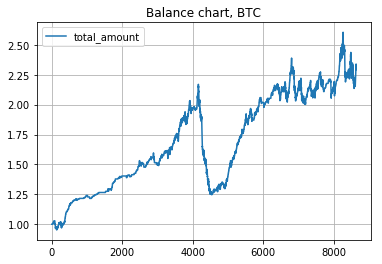

Total balance: 2.2931636776436184


In [11]:
print('Please enter starting balance in BTC ')
total = input()

print('Please enter take_profit in %')
take_profit = float(input())
take_profit = take_profit/100
print('Please enter stop_loss in %')
stop_loss = float(input())
print('Please enter a pair of coins, example(WAVESBTC) ')
pair_of_coins = input()

klines = client.get_historical_klines(pair_of_coins, Client.KLINE_INTERVAL_5MINUTE, "20 Nov, 2018", "20 Dec, 2018")
df = pd.DataFrame(klines)
df = df.iloc[:,0:6]
df.columns = ['id','open', 'high', 'low', 'close', 'total_amount']
df.loc[:,'total_amount'] = 1
df[['open', 'high', 'low', 'close']] = df[['open', 'high', 'low', 'close']].apply(pd.to_numeric)
df["Regime"] = np.where(df['high'] > df['open']*(1+take_profit) , 1, 0)
df["Regime"] = np.where(df['open']*((100-stop_loss)/100) > df['low'], -1, df["Regime"])

for i in range(1,len(df)):
    if df.loc[i,'Regime'] ==1 :
        df.loc[i,'total_amount'] = df.loc[i-1,'total_amount']*(1+take_profit)
    
    elif df.loc[i,'Regime'] ==0:
        df.loc[i,'total_amount'] = df.loc[i-1,'total_amount']
    
    elif df.loc[i,'Regime'] == -1:
        df.loc[i,'total_amount'] = df.loc[i-1,'total_amount']*((100-stop_loss)/100)
        

fig = plt.figure()
plt.plot(df['total_amount'])
plt.title("Balance chart, BTC")
plt.legend()
plt.grid(True)
plt.show()
print('Total balance:',df['total_amount'].values[-1])